<a href="https://colab.research.google.com/github/AgniRejasa/python-for-finance/blob/master/Facebook_Stock_Prediction_using_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program predicts the price of FB stock for a specific day

In [3]:
#import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [1]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving FB_stock.csv to FB_stock.csv


In [60]:
#Store and show the data
df = pd.read_csv("FB_stock.csv")
#df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
df = df.iloc[1:]
df

,Date,High,Low,Open,Close,Volume,Adj Close
1,2019-05-01,196.179993,193.009995,194.779999,193.029999,15996600,193.029999
2,2019-05-02,194.000000,189.750000,193.000000,192.529999,13209500,192.529999
3,2019-05-03,196.160004,193.710007,194.380005,195.470001,14575400,195.470001
4,2019-05-06,194.279999,190.550003,191.240005,193.880005,13994900,193.880005
5,2019-05-07,192.899994,187.850006,192.539993,189.770004,16253000,189.770004
6,2019-05-08,190.720001,188.550003,189.389999,189.539993,12505700,189.539993
7,2019-05-09,189.770004,186.259995,187.199997,188.649994,12967000,188.649994
8,2019-05-10,190.000000,184.589996,188.250000,188.339996,12578500,188.339996
9,2019-05-13,185.429993,180.839996,183.500000,181.539993,16833300,181.539993
10,2019-05-14,183.490005,178.100006,182.520004,180.729996,17628100,180.729996


In [61]:
#Get the number of rows and columns
df.shape

(22, 7)

In [62]:
#Get and print the last row of data
actual_price = df.tail(1)
actual_price

,Date,High,Low,Open,Close,Volume,Adj Close
22,2019-05-31,180.539993,177.160004,180.279999,177.470001,15226500,177.470001


In [63]:
#prepare the data for training the SVR models
#Get all of the data except for the last row
df = df.head(len(df)-1)
#Print the new data set
print(df)

          Date        High         Low  ...       Close    Volume   Adj Close
1   2019-05-01  196.179993  193.009995  ...  193.029999  15996600  193.029999
2   2019-05-02  194.000000  189.750000  ...  192.529999  13209500  192.529999
3   2019-05-03  196.160004  193.710007  ...  195.470001  14575400  195.470001
4   2019-05-06  194.279999  190.550003  ...  193.880005  13994900  193.880005
5   2019-05-07  192.899994  187.850006  ...  189.770004  16253000  189.770004
6   2019-05-08  190.720001  188.550003  ...  189.539993  12505700  189.539993
7   2019-05-09  189.770004  186.259995  ...  188.649994  12967000  188.649994
8   2019-05-10  190.000000  184.589996  ...  188.339996  12578500  188.339996
9   2019-05-13  185.429993  180.839996  ...  181.539993  16833300  181.539993
10  2019-05-14  183.490005  178.100006  ...  180.729996  17628100  180.729996
11  2019-05-15  187.279999  180.020004  ...  186.270004  16746900  186.270004
12  2019-05-16  188.580002  185.050003  ...  186.990005  1295310

In [64]:
#Create empty lists ot store the independent and dependent data
days = list()
adj_close_prices = list()

In [65]:
#Get the data and adjusted close prices
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']
df_days

1     2019-05-01
2     2019-05-02
3     2019-05-03
4     2019-05-06
5     2019-05-07
6     2019-05-08
7     2019-05-09
8     2019-05-10
9     2019-05-13
10    2019-05-14
11    2019-05-15
12    2019-05-16
13    2019-05-17
14    2019-05-20
15    2019-05-21
16    2019-05-22
17    2019-05-23
18    2019-05-24
19    2019-05-28
20    2019-05-29
21    2019-05-30
Name: Date, dtype: object

In [66]:
#Create the independent data set
for day in df_days:
  days.append([int(day.split('-')[2])])
  #days.append([int(day.day)])

#Create the dependent data set
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))

In [67]:
#Print the days and the adj close prices
print(days)
print(adj_close_prices)

[[1], [2], [3], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [28], [29], [30]]
[193.02999877929688, 192.52999877929688, 195.47000122070312, 193.8800048828125, 189.7700042724609, 189.5399932861328, 188.6499938964844, 188.33999633789062, 181.5399932861328, 180.72999572753903, 186.2700042724609, 186.9900054931641, 185.3000030517578, 182.72000122070312, 184.82000732421875, 185.32000732421875, 180.8699951171875, 181.05999755859372, 184.30999755859372, 182.19000244140625, 183.00999450683597]


In [70]:
#Create the 3 Support Vector Regression Models

#Create and train a SVr model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

#Create and train a SVr model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

#Create and train a SVr model using a rbf kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma = 0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

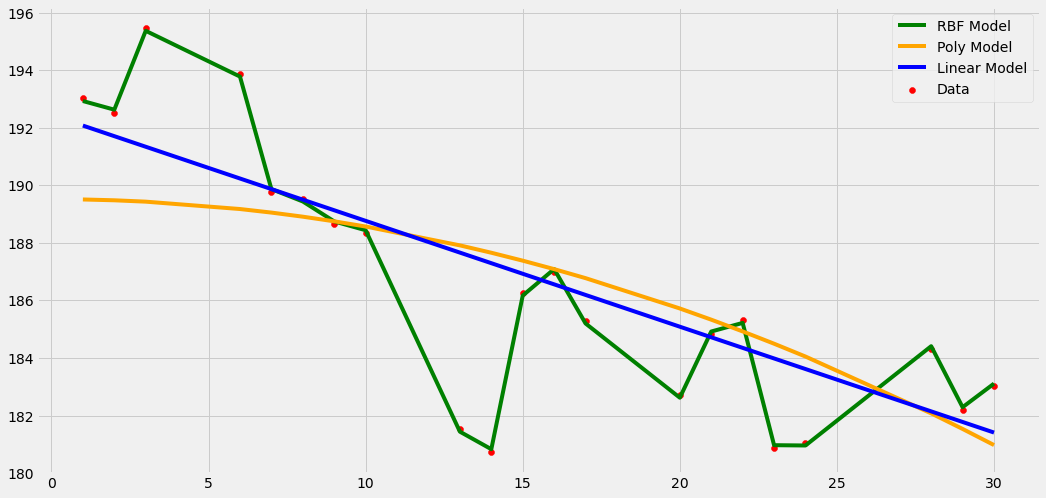

In [71]:
#plot the models on a grapd to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'red', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Poly Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Linear Model')
plt.legend()
plt.show()



In [72]:
#Show the predicted price for the given day
day = [[31]]

print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))

The RBF SVR predicted:  [185.04603397]
The Linear SVR predicted:  [181.04143808]
The Polynomial SVR predicted:  [180.39533557]


In [74]:
#print the actual price of the stock on day 31
print('The actual price:', actual_price['Adj Close'][22])

The actual price: 177.47000122070312


# New Section